In [15]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
netcdf_file = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset> Size: 2kB
Dimensions:              (DEPTH: 11)
Coordinates:
  * DEPTH                (DEPTH) float32 44B 323.0 200.3 120.1 ... 10.09 5.163
Data variables:
    CHLOROPHYLL_A_TOTAL  (DEPTH) float64 88B ...
    PHAEOPIGMENTS_TOTAL  (DEPTH) float64 88B ...
    FILTERED_VOL_TOTAL   (DEPTH) float64 88B ...
    EVENTID_TOTAL        (DEPTH) |S64 704B ...
    CHLOROPHYLL_A_10um   (DEPTH) float64 88B ...
    PHAEOPIGMENTS_10um   (DEPTH) float64 88B ...
    FILTERED_VOL_10um    (DEPTH) float64 88B ...
    EVENTID_10um         (DEPTH) |S64 704B ...
Attributes: (12/37)
    id:                                 71433e5e-e81a-5b24-a529-6be0f5f18069
    naming_authority:                   The University Centre in Svalbard, No...
    title:                              Chlorophyll A and phaeopigments Nanse...
    summary:                            'This dataset is a collection of the ...
    keywords:                           Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:                GCMD Science Keywords
    ...                                 ...
    samplingProtocol:                   Nansen Legacy sampling protocols vers...
    pi_name:                            Anna Vader
    pi_institution:                     University Centre in Svalbard
    pi_email:                           annav@unis.no
    sea_floor_depth_below_sea_surface:  332.58
    _NCProperties:                      version=2,netcdf=4.6.3,hdf5=1.10.5

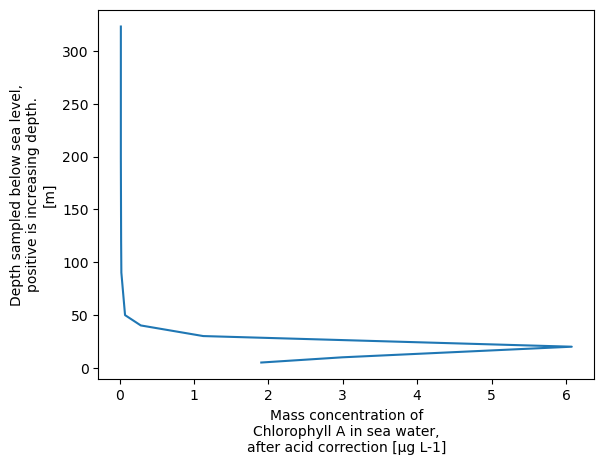

In [9]:
# can plot this a bunch of different ways
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'), y='DEPTH');

In [18]:
xrds['CHLOROPHYLL_A_10um'].attrs

{'standard_name': 'mass_concentration_of_chlorophyll_a_in_sea_water',
 'long_name': 'Mass concentration of Chlorophyll A in sea water, after acid correction',
 'units': 'μg L-1',
 'ancillary_variables': 'FILTERED_VOL_10um, EVENTID_10um',
 'coverage_content_type': 'physicalMeasurement'}

In [19]:
xrds['CHLOROPHYLL_A_TOTAL'].attrs

{'standard_name': 'mass_concentration_of_chlorophyll_a_in_sea_water',
 'long_name': 'Mass concentration of Chlorophyll A in sea water, after acid correction',
 'units': 'μg L-1',
 'ancillary_variables': 'FILTERED_VOL_TOTAL, EVENTID_TOTAL',
 'coverage_content_type': 'physicalMeasurement'}

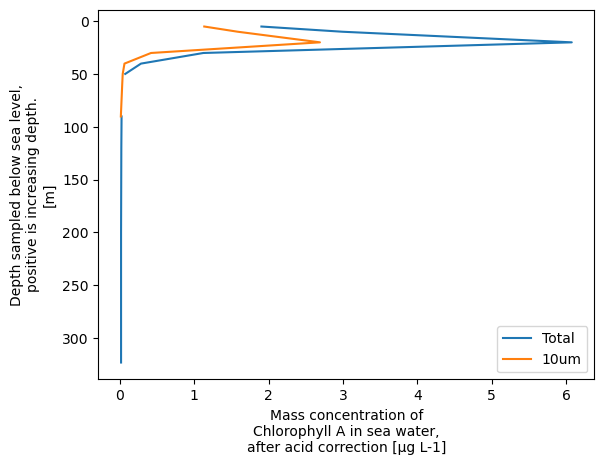

In [20]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', label='Total', yincrease=False)
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', label='10um')
plt.legend();

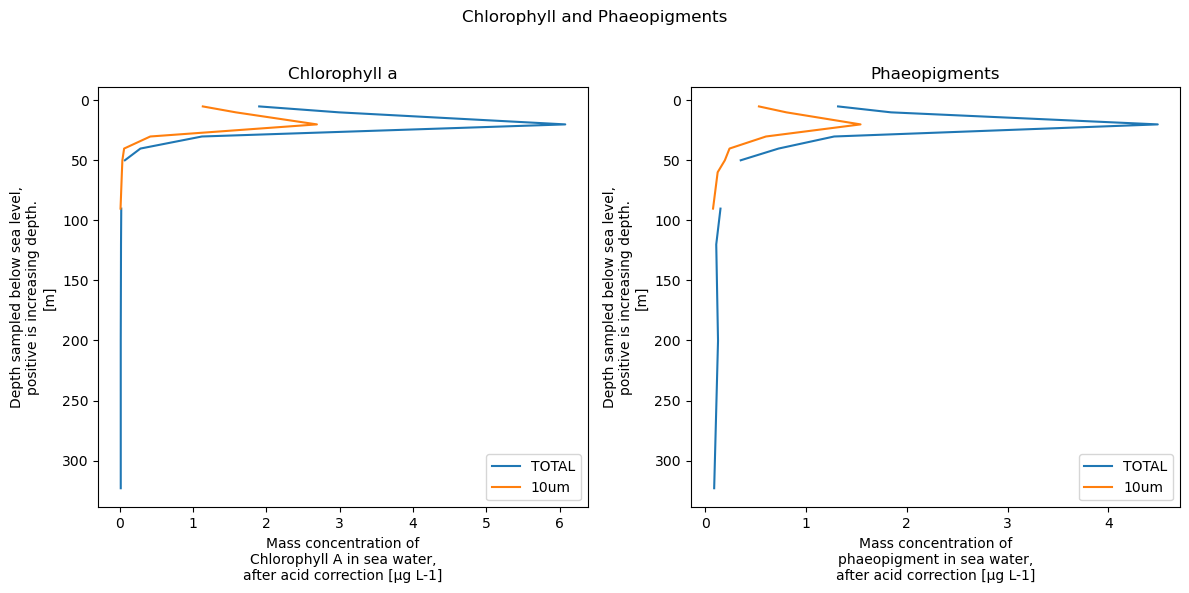

In [21]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL', ax=axes[0])
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax=axes[0])
axes[0].set_title('Chlorophyll a')
axes[0].legend()

xrds['PHAEOPIGMENTS_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL', ax=axes[1])
xrds['PHAEOPIGMENTS_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax=axes[1])
axes[1].set_title('Phaeopigments')
axes[1].legend()

# Adjust layout and display the plot
plt.suptitle('Chlorophyll and Phaeopigments')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to avoid overlap
plt.show()